# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands




## Assignment Workflow

**1.Data understanding**<br>
1.Import libraries required<br>
2.Load dataset<br>
3.identify info,description,shape & size<br>
4.Identify first and last 5 rows<br>

**2.DataCleaning & manipulation**<br>
1.Identify and resolve missing values<br>
2.Identify and resolve data redundancy<br>
3.Identify and convert to proper datatypes<br>
4.Identify and create derived columns wherever required<br>

**3.EDA process**<br>
1.Define functions
2.Univariant Analysis<br>
3.Segmented Analysis<br>
4.Bivarient Analysis<br>
5.Identify correlation<br>
6.Identify 5 important driver variables<br>
7.Make correct assumptions<br>


**4.Model Building & Evaluation<br>

**4.Simple Linear Regression Model<br>

**4.Multiple Linear Regression Model<br>
**4.Prediction<br>
**3.Subjective Questions-PDF**<br>


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

### Data understandng
#### Import Libraries required for data analysis in EDA

In [3]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
# create models

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# sklearn.model_selection  is the module
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




In [4]:
import warnings
warnings.filterwarnings('ignore')

#### Load dataset from folder path

In [6]:
# Reading the dataset
bs_data = pd.read_csv("day.csv")

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [8]:
#find top 5 rows of dataset
bs_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#find last 5 rows of dataset
bs_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


from head and tail data we can infer that it contains data for 2018 and 2019. And from the column yr which is 0 and 1 , we can infer that it is against 2018 and 2019 respectively

In [10]:
#shape of bs_data- relates to the size of the dimensions of an N-dimensional array.
#it contains 730 rows and 116 columns
bs_data.shape

(730, 16)

In [11]:
#size of loan_data-the amount of data is 730x16=11680
bs_data.size

11680

In [12]:
#identify  day.csv dataset description
bs_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
#identify  bs_data info
print(bs_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


### Data Cleaning

In [14]:
#### Handling missing values

In [15]:
#Identify missing value columns there in dataset
missing_values=bs_data.isna().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [16]:
#no:of columns computed for  missing value
missing_values.count()

16

From the above missing value imputation, we can infer that all the 16 columns data doesnt contain any missing value hence it is 0.

Identify Categorical variables unique values:

In [17]:
#Identify season column unique values
print("season :",bs_data.season.unique())
#Identify month column unique values
print("month :",bs_data.mnth.unique())
#Identify weathersit column unique values
print("weathersit :",bs_data.weathersit.unique())
#Identify workingday column unique values
print("workingday :",bs_data.workingday.unique())
#Identify weekday column unique values
print("weekday :",bs_data.weekday.unique())


season : [1 2 3 4]
month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
weathersit : [2 1 3]
workingday : [0 1]
weekday : [6 0 1 2 3 4 5]


#### Data type conversions

In [18]:
# Finding datatype of all coulmns
print(bs_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


#from above datatypes, it is visible that the date information-dteday column is in object data type.
#So dteday column will be converted to  date column

#### Handling date columns

In [19]:
#identify  to dteday column values

bs_data.dteday

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

In [20]:
print(bs_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


##### Create custom fields/variables

In [21]:
# Create mapping for season to identify better:
weekday_mapping={
    0:'Tuesday',
    1:'Wednesday',
    2:'Thursday',
    3:'Friday',
    4:'Saturday',
    5:'Sunday',
    6:'Monday',
    

}

bs_data['weekday']=bs_data['weekday'].map(weekday_mapping)

In [22]:
print(bs_data['weekday'])

0         Monday
1        Tuesday
2      Wednesday
3       Thursday
4         Friday
         ...    
725     Saturday
726       Sunday
727       Monday
728      Tuesday
729    Wednesday
Name: weekday, Length: 730, dtype: object


In [23]:
bs_data.weekday.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [24]:
#convert season categorical variable

bs_data.loc[(bs_data['season']==1),'season']='Spring'
bs_data.loc[(bs_data['season']==2),'season']='Summer'
bs_data.loc[(bs_data['season']==3),'season']='Fall'
bs_data.loc[(bs_data['season']==4),'season']='Winter'


bs_data['season'].astype('category').value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [85]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
bs_data[['mnth']] = bs_data[['mnth']].apply(object_map)

In [86]:
bs_data['mnth']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [27]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bs_data.loc[(bs_data['weathersit'] == 1) , 'weathersit'] = 'F'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bs_data.loc[(bs_data['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bs_data.loc[(bs_data['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bs_data.loc[(bs_data['weathersit'] == 4) , 'weathersit'] = 'D'

bs_data['weathersit'].astype('category').value_counts()


F    463
B    246
C     21
Name: weathersit, dtype: int64

In [28]:
bs_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,Monday,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,Tuesday,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,Wednesday,1,F,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,Thursday,1,F,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,Friday,1,F,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
# whether day is a holiday or not (0: No, 1: Yes)
bs_data['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [30]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
bs_data['weekday'].astype('category').value_counts()

Monday       105
Tuesday      105
Wednesday    105
Saturday     104
Sunday       104
Thursday     104
Friday       103
Name: weekday, dtype: int64

In [31]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
bs_data['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [32]:
bs_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


In [33]:
# Extracting the type of weather situations present in the data
bs_data['weathersit'].unique()

array(['B', 'F', 'C'], dtype=object)

In [34]:
# Taking count based on weather situations
bs_data['weathersit'].astype('category').value_counts()

F    463
B    246
C     21
Name: weathersit, dtype: int64

# EDA

###  Data Visualization using Univarient and Bivariant analysis



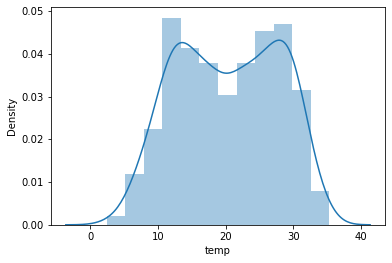

In [35]:
# temperature
sns.distplot(bs_data['temp'])
plt.show()

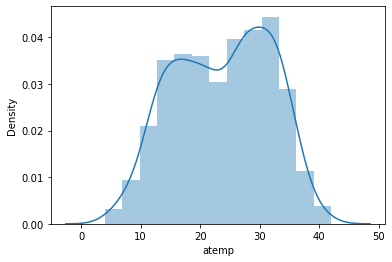

In [36]:
# feeling temperature
sns.distplot(bs_data['atemp'])
plt.show()

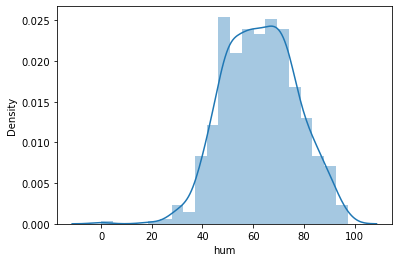

In [37]:
# humidity
sns.distplot(bs_data['hum'])
plt.show()

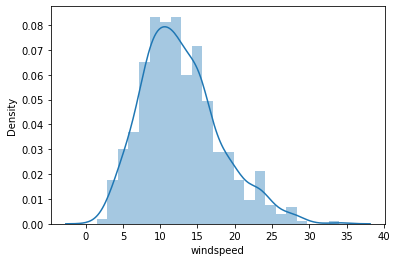

In [38]:
# wind speed
sns.distplot(bs_data['windspeed'])
plt.show()

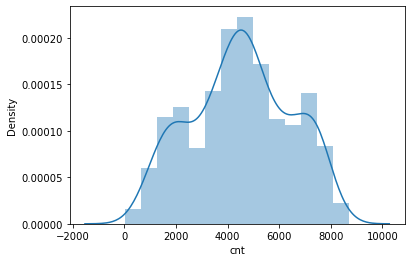

In [39]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(bs_data['cnt'])
plt.show()

In [42]:
bs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


In [43]:
# Converting date to datetime format
bs_data['dteday']=bs_data['dteday'].astype('datetime64')

In [87]:
# All categorical variables in the dataset
bs_data_categorical=bs_data.select_dtypes(exclude=['float64','datetime64','int64'])
print(bs_data_categorical.columns)

Index([     'mnth',    'Spring',    'Summer',    'Winter',           2,
                 3,           4,           5,           6,           7,
                 8,           9,          10,          11,          12,
          'Monday',  'Saturday',    'Sunday',  'Thursday',   'Tuesday',
       'Wednesday',         'C',         'F'],
      dtype='object')


In [88]:
bs_data_categorical

,mnth,Spring,Summer,Winter,2,3,4,5,6,7,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,C,F
0,Jan,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Jan,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Jan,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,Jan,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,Jan,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Dec,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
726,Dec,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
727,Dec,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
728,Dec,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


#### Visualising dependant Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

ValueError: Could not interpret input 'season'

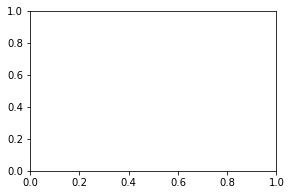

In [89]:
plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bs_data)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = bs_data)


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [50]:
# All numeric variables in the dataset
bs_data_numeric = bs_data.select_dtypes(include=['float64'])
bs_data_numeric.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


In [ ]:
# Pairwise scatter plot
sns.pairplot(bs_data_numeric)
plt.show()

# Correlation Analysis

In [90]:
# Correlation matrix
bs_data.corr()

bs_data.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,C,F
0,0,Jan,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,0
2,0,Jan,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,1
3,0,Jan,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,1
4,0,Jan,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

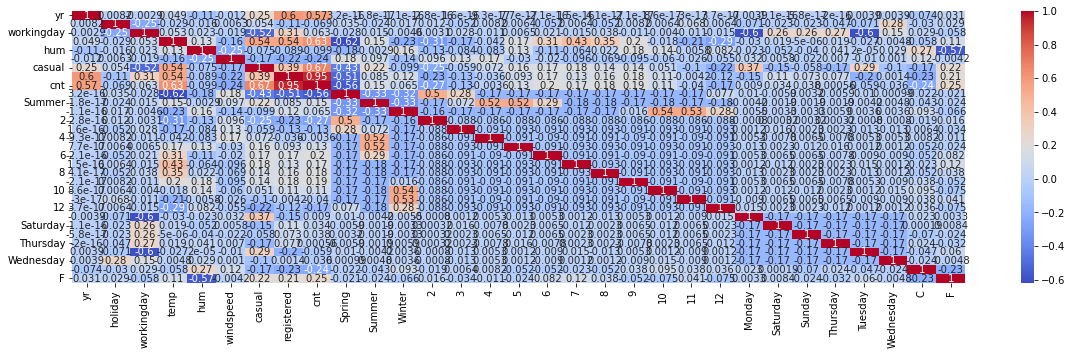

In [91]:
plt.figure(figsize=(20,5))
sns.heatmap(bs_data.corr(),cmap="coolwarm",annot=True)

In [53]:
# temp and atemp mostly have similar values and highly correlated with each other- so can remove one variable
#-remove atemp

#yr and instant are highly correlated with eac other, since yr is having more positive correlation with cnt will rmove instant


In [92]:
#removing atemp as it is highly correlated with temp
bs_data.drop('atemp',axis=1,inplace=True)

KeyError: "['atemp'] not found in axis"

## 3. Data Preparation


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers.

For this, we will use something called `dummy variables`.

In [ ]:
bs_data_categorical.info()

In [93]:
# Convert into dummies
df_season=pd.get_dummies(bs_data["season"],drop_first=True)
df_month=pd.get_dummies(bs_data["mnth"],drop_first=True)
df_weekday=pd.get_dummies(bs_data["weekday"],drop_first=True)
df_weathersit=pd.get_dummies(bs_data["weathersit"],drop_first=True)

print(df_season)
print(df_month)
print(df_weekday)
print(df_weathersit)

KeyError: 'season'

In [94]:
# Concatenate dummy variables with the original dataframe
bs_data=pd.concat([bs_data,df_season,df_month,df_weekday,df_weathersit],axis=1)
bs_data.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,C,F
0,0,Jan,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,0
2,0,Jan,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,1
3,0,Jan,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,1
4,0,Jan,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


In [95]:
bs_data.dtypes

yr              int64
mnth           object
holiday         int64
workingday      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
Spring          uint8
Summer          uint8
Winter          uint8
2               uint8
3               uint8
4               uint8
5               uint8
6               uint8
7               uint8
8               uint8
9               uint8
10              uint8
11              uint8
12              uint8
Monday          uint8
Saturday        uint8
Sunday          uint8
Thursday        uint8
Tuesday         uint8
Wednesday       uint8
C               uint8
F               uint8
Spring          uint8
Summer          uint8
Winter          uint8
2               uint8
3               uint8
4               uint8
5               uint8
6               uint8
7               uint8
8               uint8
9               uint8
10              uint8
11              uint8
12        

In [96]:
# Drop categorical variable columns
bs_data = bs_data.drop(list(bs_data_categorical.columns), axis=1)
bs_data.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,0,0,0,14.110847,80.5833,10.749882,331,654,985
1,0,0,0,14.902598,69.6087,16.652113,131,670,801
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600


In [60]:
bs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   workingday  730 non-null    int64         
 6   temp        730 non-null    float64       
 7   hum         730 non-null    float64       
 8   windspeed   730 non-null    float64       
 9   casual      730 non-null    int64         
 10  registered  730 non-null    int64         
 11  cnt         730 non-null    int64         
 12  Spring      730 non-null    uint8         
 13  Summer      730 non-null    uint8         
 14  Winter      730 non-null    uint8         
 15  2           730 non-null    uint8         
 16  3           730 non-null  

In [97]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bs_data=bs_data.drop(['instant','dteday'], axis = 1, inplace = False)
bs_data.head()

KeyError: "['instant', 'dteday'] not found in axis"

In [98]:
bs_data.shape

(730, 9)

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [99]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bs_data, train_size=0.75, test_size=0.25, random_state=50)

In [64]:
df_train

,yr,mnth,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,C,F
98,0,4,0,0,14.042500,87.7500,8.916561,879,1576,2455,...,0,0,1,0,0,0,0,0,0,0
396,1,2,0,1,19.235847,50.7917,12.667489,304,4275,4579,...,0,0,0,0,0,0,0,0,0,1
175,0,6,0,0,28.495000,48.3333,14.041257,1782,3420,5202,...,0,0,1,0,0,0,0,0,0,1
454,1,3,0,0,17.390847,73.8333,16.791339,2301,3934,6235,...,0,0,1,0,0,0,0,0,0,0
234,0,8,0,1,26.274153,45.5417,9.833121,1281,4614,5895,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,5,0,1,21.012500,86.3333,12.041575,692,3413,4105,...,0,0,0,0,1,0,0,0,0,0
289,0,10,0,1,21.900847,57.9583,11.750393,713,3857,4570,...,0,0,0,0,0,0,0,1,0,1
109,0,4,0,1,24.395000,61.4167,16.208975,613,3331,3944,...,0,0,0,0,0,0,0,0,0,1
480,1,4,0,1,20.431653,75.6667,11.833875,475,4551,5026,...,0,0,0,1,0,0,0,0,0,0


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [102]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [68]:
df_train

,yr,mnth,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,C,F
98,0,4,0,0,0.353092,0.904250,0.189757,879,1576,0.279913,...,0,0,1,0,0,0,0,0,0,0
396,1,2,0,1,0.510926,0.523401,0.310919,304,4275,0.524275,...,0,0,0,0,0,0,0,0,0,1
175,0,6,0,0,0.792325,0.498067,0.355294,1782,3420,0.595950,...,0,0,1,0,0,0,0,0,0,1
454,1,3,0,0,0.454854,0.760841,0.444127,2301,3934,0.714795,...,0,0,1,0,0,0,0,0,0,0
234,0,8,0,1,0.724830,0.469300,0.219363,1281,4614,0.675679,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,5,0,1,0.564921,0.889652,0.290701,692,3413,0.469742,...,0,0,0,0,1,0,0,0,0,0
289,0,10,0,1,0.591919,0.597251,0.281295,713,3857,0.523240,...,0,0,0,0,0,0,0,1,0,1
109,0,4,0,1,0.667720,0.632890,0.425316,613,3331,0.451220,...,0,0,0,0,0,0,0,0,0,1
480,1,4,0,1,0.547268,0.779734,0.283992,475,4551,0.575702,...,0,0,0,1,0,0,0,0,0,0


In [103]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.486289,0.025594,0.700183,0.539238,0.643969,0.317546,828.853748,3634.594150,0.510981
std,0.500269,0.158066,0.458597,0.225899,0.147268,0.167984,677.032972,1567.077246,0.223525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333364,0.528982,0.197183,309.500000,2472.500000,0.352163
50%,0.000000,0.000000,1.000000,0.538962,0.645771,0.294759,695.000000,3658.000000,0.519673
75%,1.000000,0.000000,1.000000,0.743521,0.750751,0.406464,1056.000000,4742.500000,0.676254
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6911.000000,1.000000


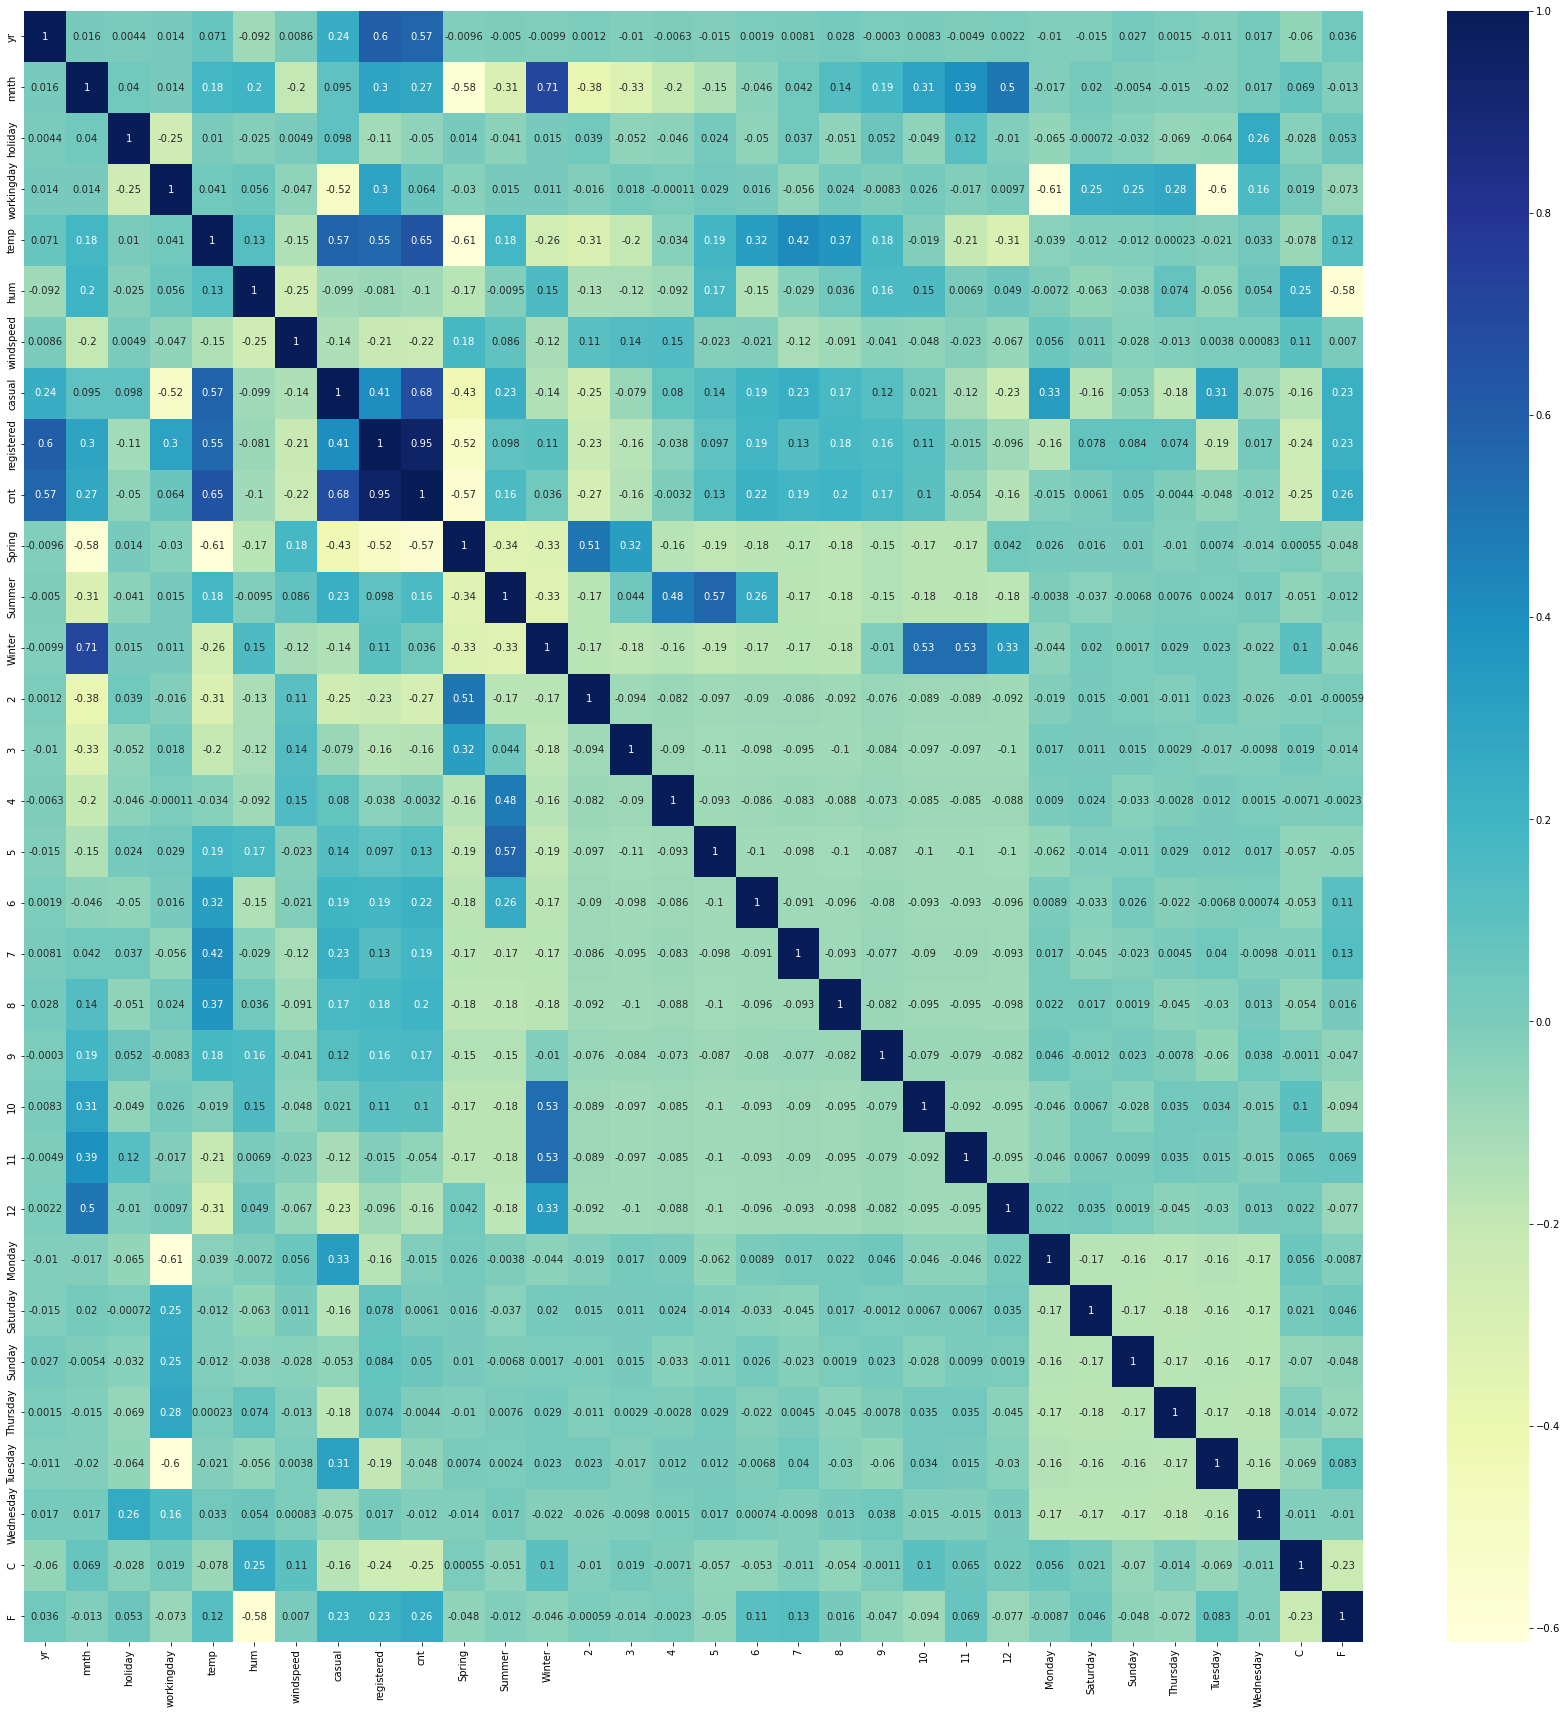

In [70]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

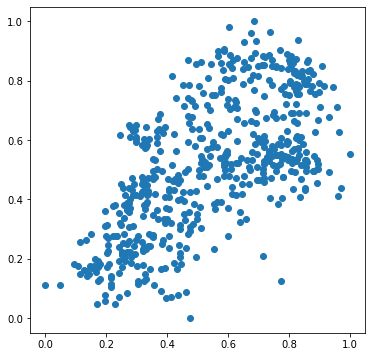

In [71]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [104]:

y_train = df_train.pop('cnt')
X_train = df_train

In [105]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered
98,0,0,0,0.353092,0.904250,0.189757,879,1576
396,1,0,1,0.510926,0.523401,0.310919,304,4275
175,0,0,0,0.792325,0.498067,0.355294,1782,3420
454,1,0,0,0.454854,0.760841,0.444127,2301,3934
234,0,0,1,0.724830,0.469300,0.219363,1281,4614


In [106]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.89756802e-01, 8.79000000e+02, 1.57600000e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.10918870e-01, 3.04000000e+02, 4.27500000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.55294175e-01, 1.78200000e+03, 3.42000000e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.25315566e-01, 6.13000000e+02, 3.33100000e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.83991561e-01, 4.75000000e+02, 4.55100000e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        8.07706725e-02, 5.34000000e+02, 5.10000000e+03]])

In [107]:
X_train.shape

(547, 8)

### Building the first model with all the features

Let's now build our first model with all the features.

In [108]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -2.531063e-03
yr            2.081668e-16
holiday       1.318390e-16
workingday   -3.122502e-17
temp         -1.387779e-16
hum           5.551115e-17
windspeed     6.938894e-17
casual        1.150483e-04
registered    1.150483e-04
dtype: float64

In [109]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [78]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.11542435e-16 -1.03392784e-18  8.33894054e-17  1.91749232e-17
  1.83094527e-17 -2.18734791e-16  2.01202394e-17  1.15048320e-04
  1.15048320e-04  3.09474175e-17  6.04824083e-17  2.11895623e-17
 -3.68879205e-17  3.26138215e-17  1.24257836e-17  3.62191346e-17
  8.29765913e-18 -1.10199438e-17 -1.62248113e-17 -5.78668466e-18
 -7.08602872e-18 -4.96901472e-18  7.81554244e-18 -8.26116546e-17
  1.46418518e-18 -8.61476120e-18  2.26400855e-17 -2.00489736e-17
 -1.64536611e-17  4.81034093e-18 -8.02326769e-18]
-0.0025310630464794315


In [110]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.429e+31
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:58:36   Log-Likelihood:                 18658.
No. Observations:                 547   AIC:                        -3.730e+04
Df Residuals:                     538   BIC:                        -3.726e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025    1.1e-16   -2.3e+13      0.000      -0.003      -0.003
yr          2.082e-16    4.7e-17      4.429      0.000    1.16e-16       3e-16
holiday     1.318e-16   1.05e-16      1.251      0.211   -7.52e-17    3.39e-16
workingday -3.123e-17   5.86e-17     -0.533      0.594   -1.46e-16    8.39e-17
temp       -1.388e-16   1.15e-16     -1.211      0.227   -3.64e-16    8.64e-17
hum         5.551e-17    1.2e-16      0.462      0.644   -1.81e-16    2.92e-16
windspeed   6.939e-17   1.05e-16      0.662      0.508   -1.36e-16    2.75e-16
casual         0.0001    4.5e-20   2.56e+15      0.000       0.000       0.000
registered     0.0001    2.1e-20   5.47e+15      0.000       0.000       0.000
==============================================================================
Omnibus:                       20.610   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.254
Skew:                          -0.208   Prob(JB):                      0.00218
Kurtosis:                       2.397   Cond. No.                     4.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""